In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
customers = pd.read_csv(r"D:\work\Ecommerce Customers.csv")
customers.sample(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
214,drew29@hotmail.com,"20888 Erin Via\nGrahamville, NH 72913-6101",Tomato,32.078948,12.725909,36.544664,1.139094,357.863719
227,melinda39@morton.info,"13693 Cox Falls Apt. 693\nPadillaview, PW 2899...",Moccasin,31.948017,13.085357,37.605653,2.648597,461.920877
222,sanchezkara@hotmail.com,"40494 Robert Park\nHeatherside, IL 70364",SlateBlue,34.334865,11.109456,38.585855,3.892891,502.409785
374,aaron89@gmail.com,"0128 Sampson Loop Suite 943\nHoffmanton, MO 02122",SaddleBrown,31.447446,10.101632,38.043453,4.238296,418.602742
38,cunninghamwilliam@hotmail.com,"4589 Dan Fords\nBeasleyburgh, ME 96590-8272",HoneyDew,32.749368,9.954976,37.388315,4.650491,478.170334
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
93,larrywest@davis.com,"21918 Gail Glens\nBarbershire, SD 45790-8387",MidnightBlue,33.710653,13.664748,37.724386,1.362674,439.074767
258,russellbaldwin@ferrell.info,"295 Michael Keys Apt. 706\nEricfurt, KS 09476",Orange,33.247268,14.069382,38.993322,4.978476,660.425184
315,angela25@walker.com,"456 Eric Views\nNorth Amanda, MS 98876-3102",Chocolate,34.501418,12.447617,37.534530,4.008352,584.105885
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146


In [3]:
customers.shape

(500, 8)

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
a = customers.groupby('Avatar')

In [6]:
for Avatar , Avatar_customers in a :
    print(Avatar)
    print(Avatar_customers)

AliceBlue
                       Email  \
209  wagnerbrian@hotmail.com   
448        flevine@gmail.com   

                                               Address     Avatar  \
209  50593 Wells Roads Apt. 110\nSouth Amy, MI 0696...  AliceBlue   
448  5292 Melanie Crescent Apt. 064\nFischerborough...  AliceBlue   

     Avg. Session Length  Time on App  Time on Website  Length of Membership  \
209            32.559493    11.797796        37.777366              3.195626   
448            32.204655    12.480702        37.680288              3.279466   

     Yearly Amount Spent  
209           468.668466  
448           478.584286  
AntiqueWhite
                      Email                                          Address  \
208  freemantina@cannon.org      870 Dennis Throughway\nWilsonport, PW 12658   
288       nwagner@yahoo.com                 Unit 2079 Box 7792\nDPO AP 47668   
302       lmalone@gmail.com                   USS Beasley\nFPO AP 50556-7615   
376       sfarley@jones.com  0

In [7]:
customers['Avatar'].value_counts()


SlateBlue               7
Cyan                    7
CadetBlue               7
GreenYellow             7
Teal                    7
                       ..
MediumPurple            1
CornflowerBlue          1
LightGoldenRodYellow    1
PowderBlue              1
LawnGreen               1
Name: Avatar, Length: 138, dtype: int64

In [8]:
customers.drop(['Email','Address','Avatar'], axis=1,inplace = True)

In [9]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


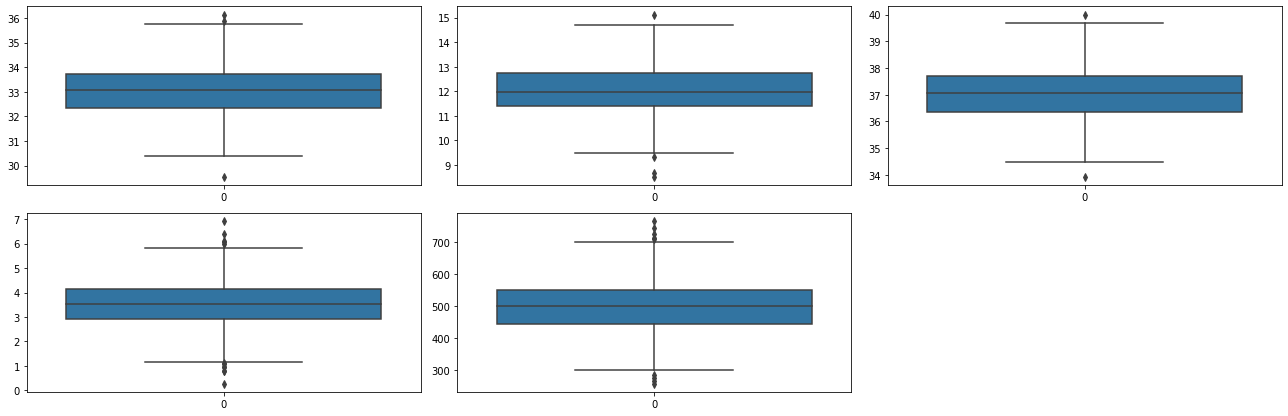

In [10]:
n=1
plt.figure(figsize=(18,20))
for column in customers.describe().columns:
    plt.subplot(7,3,n)
    n=n+1
    sns.boxplot(customers[column]) 
    plt.tight_layout()

<AxesSubplot: >

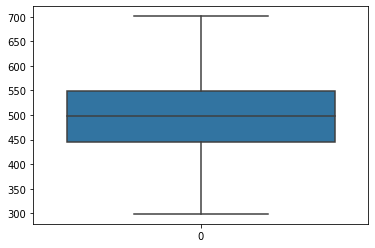

In [11]:

Q1 = np.percentile(customers['Yearly Amount Spent'], 25) 
Q3 = np.percentile(customers['Yearly Amount Spent'], 75)
IQR = Q3 - Q1
customers['Yearly Amount Spent'] =np.where(customers['Yearly Amount Spent'] >= (Q3+1.5*IQR), Q3 ,customers['Yearly Amount Spent'])
customers['Yearly Amount Spent'] =np.where(customers['Yearly Amount Spent'] <= (Q1-1.5*IQR), Q1 ,customers['Yearly Amount Spent'])
sns.boxplot(customers['Yearly Amount Spent'])
# customers['Yearly Amount Spent'].describe()

<AxesSubplot: >

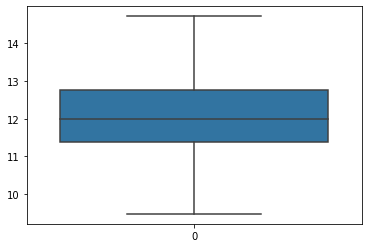

In [12]:
Q1 = np.percentile(customers['Time on App'], 25) 
Q3 = np.percentile(customers['Time on App'], 75)
IQR = Q3 - Q1
customers['Time on App'] =np.where(customers['Time on App']>= (Q3+1.5*IQR), Q3 ,customers['Time on App'])
customers['Time on App'] =np.where(customers['Time on App'] <= (Q1-1.5*IQR), Q1 ,customers['Time on App'])
sns.boxplot(customers['Time on App'])

<AxesSubplot: >

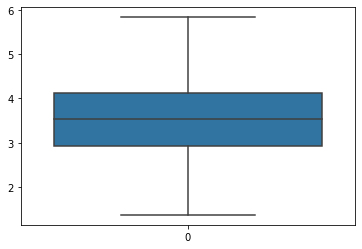

In [13]:
Q1 = np.percentile(customers['Length of Membership'], 25) 
Q3 = np.percentile(customers['Length of Membership'], 75)
IQR = Q3 - Q1
customers['Length of Membership'] =np.where(customers['Length of Membership']>= (Q3+1.5*IQR), Q3 ,customers['Length of Membership'])
customers['Length of Membership'] =np.where(customers['Length of Membership']<= (Q1-1.4*IQR), Q1 ,customers['Length of Membership'])
sns.boxplot(customers['Length of Membership'])

<AxesSubplot: >

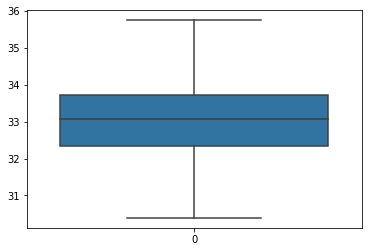

In [14]:
Q1 = np.percentile(customers['Avg. Session Length'], 25) 
Q3 = np.percentile(customers['Avg. Session Length'], 75)
IQR = Q3 - Q1
customers['Avg. Session Length'] =np.where(customers['Avg. Session Length']>= (Q3+1.5*IQR), Q3 ,customers['Avg. Session Length'])
customers['Avg. Session Length'] =np.where(customers['Avg. Session Length'] <= (Q1-1.5*IQR), Q1 ,customers['Avg. Session Length'])
sns.boxplot(customers['Avg. Session Length'])

<AxesSubplot: >

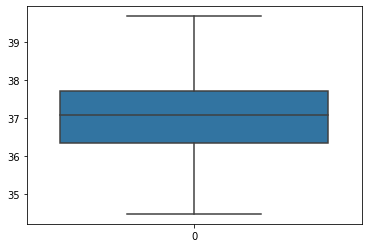

In [15]:
Q1 = np.percentile(customers['Time on Website'], 25) 
Q3 = np.percentile(customers['Time on Website'], 75)
IQR = Q3 - Q1
customers['Time on Website'] =np.where(customers['Time on Website']>= (Q3+1.5*IQR), Q3 ,customers['Time on Website'])
customers['Time on Website'] =np.where(customers['Time on Website'] <= (Q1-1.5*IQR), Q1 ,customers['Time on Website'])
sns.boxplot(customers['Time on Website'])

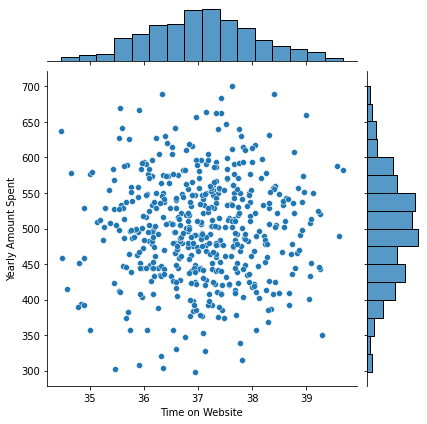

In [16]:

sns.jointplot(x='Time on Website',y ='Yearly Amount Spent', data = customers)

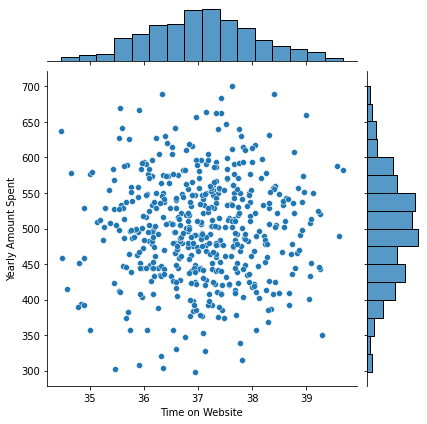

In [17]:
sns.jointplot(x='Time on Website',y ='Yearly Amount Spent', data = customers)

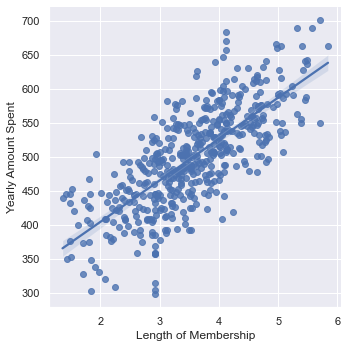

In [18]:
sns.set(color_codes=True)
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=customers)

In [19]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [20]:
y= customers['Yearly Amount Spent']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [24]:
lm.coef_

array([23.58315902, 37.31314374,  0.81003862, 62.06873831])

In [25]:
predictions = lm.predict(X_test)
predictions[:20]

array([453.75468737, 407.88548363, 414.63731244, 590.33003035,
       592.22271017, 547.30249529, 577.28735941, 709.72876194,
       469.97821213, 547.5273332 , 338.84714248, 495.61188016,
       553.51117594, 408.39673065, 670.8952644 , 546.06199707,
       689.89795534, 507.12378976, 569.2808447 , 572.10806248])

Text(0, 0.5, 'Predicted Y')

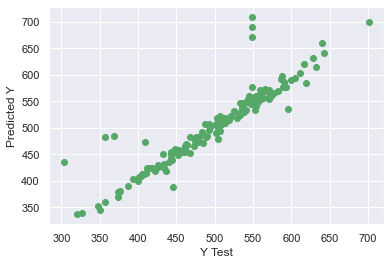

In [26]:
plt.scatter(y_test,predictions,color = "g")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [27]:
from sklearn import metrics

In [28]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R2 score',metrics.r2_score(y_test,predictions))

MAE :   13.66177266988517
MSE :   869.6314673662429
RMSE :   29.489514532562975
R2 score 0.8413502942351018
